# Final Project Submission

Please fill out:
* Student name: Bryan DiCarlo
* Student pace: Full Time Online 4/15/19 Cohort
* Scheduled project review date/time: 08/20/2019 12:00pm
* Instructor name: Rafael Carrasco
* Blog post URL: https://bryan-dicarlo.github.io/machine_learning_and_deep_learning_comparison


# Introduction: Comparison of DL and ML Models for Classifying Pulsar Stars
- HTRU2 is a data set which describes a sample of pulsar candidates collected during the High Time Resolution Universe Survey.
- Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter.
- As pulsars rotate, their emission beam sweeps across the sky, and when this crosses our line of sight, produces a detectable pattern of broadband radio emission. As pulsars rotate rapidly, this pattern repeats periodically. Thus pulsar search involves looking for periodic radio signals with large radio telescopes.
- We will be using Deep Learning and Machine Learning to identify Pulsar Stars and make predictions based on these patterns


# The Pulsar Stars Dataset
- Mean of the integrated profile.
- Standard deviation of the integrated profile.
- Excess kurtosis of the integrated profile.
- Skewness of the integrated profile.
- Mean of the DM-SNR curve.
- Standard deviation of the DM-SNR curve.
- Excess kurtosis of the DM-SNR curve.
- Skewness of the DM-SNR curve.
- Class

# Objective and Methodology
- To predict Pulsar star classificatiion based on patterns within this data set using deep and machine learning
- The data will be explored and pre-processed for best modeling results
- A baseline model will be built.
- Multiple model optimizations will be employed
- Models will be evaluated using multiple factors
    - Training and test loss and acuracy curves
    - Overall classification metrics and confusion matrices
    - 10-Fold cross validation
    - These evaluations will be performed for the test set as well as a holdout validation set
- The best performing model will be chosen based on these factors 

# Imports and EDA

In [1]:
from imblearn.over_sampling import SMOTE, ADASYN
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(10)
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style("darkgrid")

C:\Users\bryan\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


## Read the Pulsar Star Data

In [2]:
# Read the Pulsar Star data into a Pandas DataFrame
df_a = pd.read_csv('pulsar_stars.csv')
df_a.shape

(17898, 9)

In [3]:
# View the Data
df_a.head()

,Mean IP,SD IP,Kurtosis IP,Skewness IP,Mean DM-SNR,SD DM-SNR,Kurtosis DM-SNR,Skewness DM-SNR,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [4]:
#Prepare the Data for SMOTE
X_a = df_a.drop(['target_class'], axis=1)
y_a = df_a.target_class
print(X_a.shape, y_a.shape)

(17898, 8) (17898,)


## Inspect The Class Imbalance

In [5]:
# Value Counts to inspect the Imbalance
y_a.value_counts()

0    16259
1     1639
Name: target_class, dtype: int64

## Address the Imbalance with Synthetic Minority Oversampling SMOTE

In [6]:
# SMOTE resampling
X_resampled, y_resampled = SMOTE(random_state=10).fit_sample(X_a, y_a)

In [7]:
# Return the features and target back into a Pandas DataFrames
df_X = pd.DataFrame(X_resampled, columns=X_a.columns)
df_y = pd.DataFrame(y_resampled, columns=['target_class'])

In [8]:
# Concatenate the resampled features and target into one DataFrame
df = pd.concat([df_X, df_y], axis=1)
df.head(5)

,Mean IP,SD IP,Kurtosis IP,Skewness IP,Mean DM-SNR,SD DM-SNR,Kurtosis DM-SNR,Skewness DM-SNR,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [9]:
# Inspect the shape of the new DataFrame
df.shape

(32518, 9)

## We Now Have Balanced Classes For Modeling

In [10]:
# Inspect the new balanced Target Classes
df.target_class.value_counts()

1    16259
0    16259
Name: target_class, dtype: int64

## Inspect Data to Determine Appropriate Pre-processing

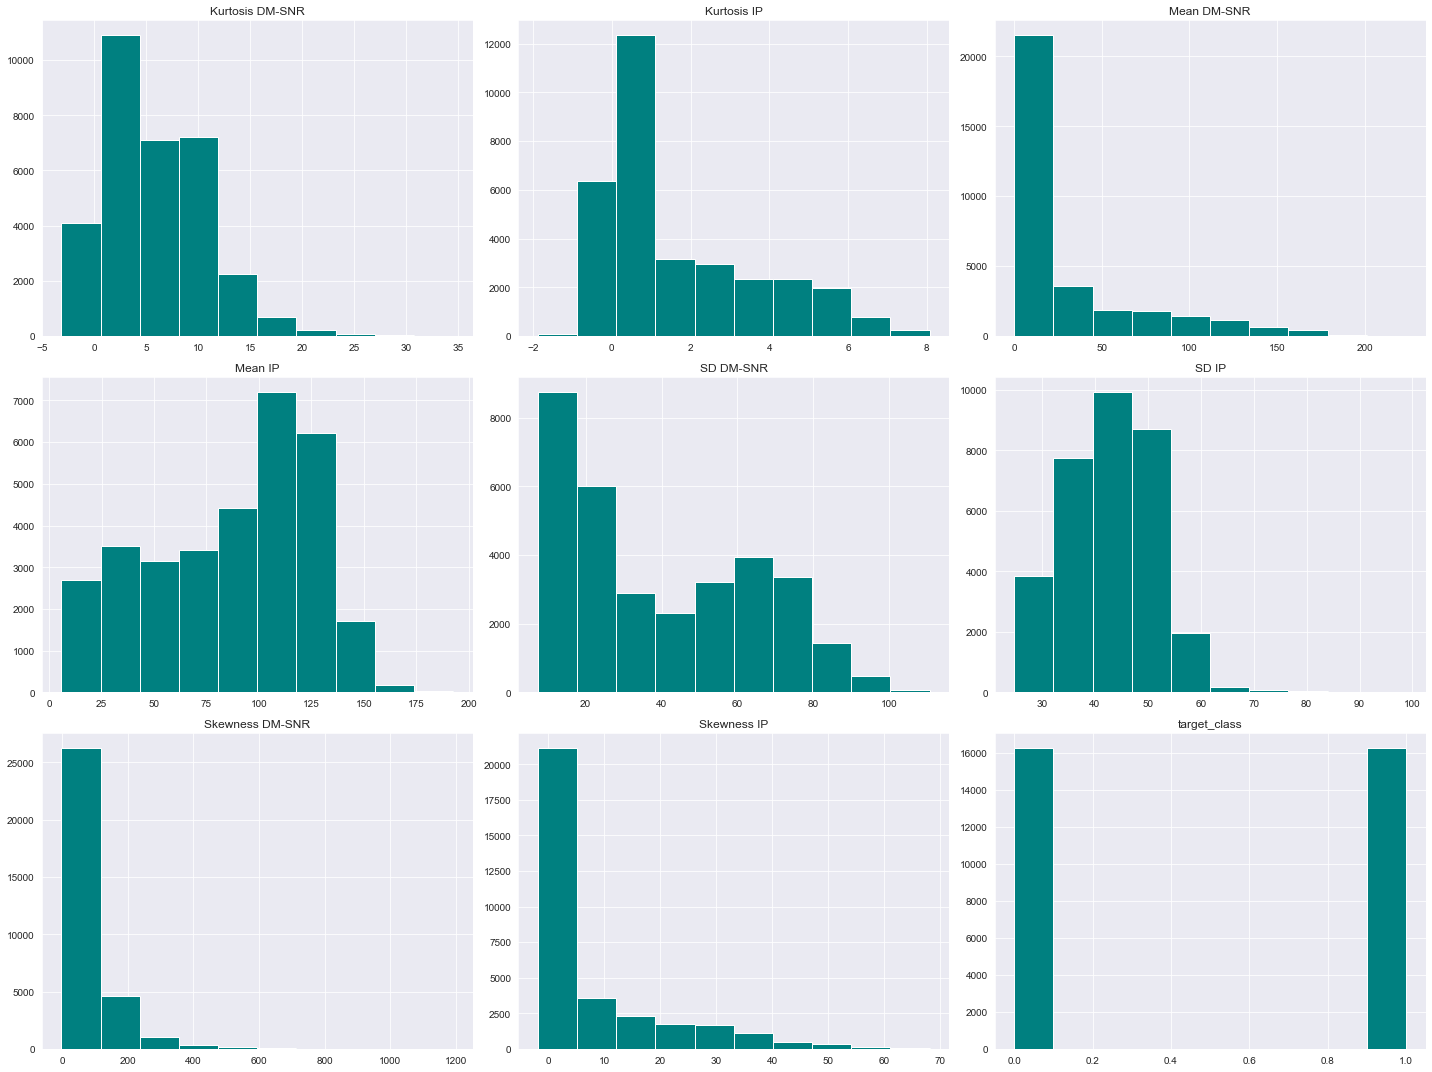

In [11]:
# Visualization Distribution of the Dataset
df.hist(figsize=(20,15), color="teal")
plt.tight_layout()
plt.show()

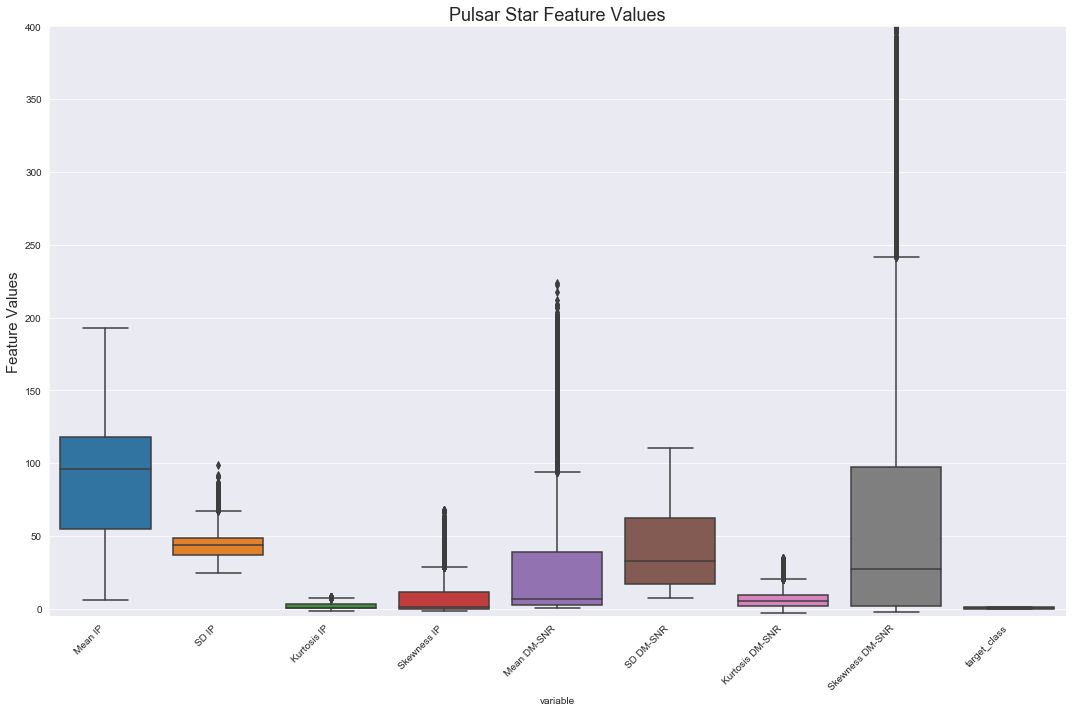

In [12]:
# Plot Data Features to inspect Scale and Distribution
plt.figure(figsize=(15,10))
sns.boxplot(x="variable", y="value", data=pd.melt(df))
plt.ylim(-5, 400)
plt.title('Pulsar Star Feature Values', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Feature Values', fontsize= 15)
plt.tight_layout()
plt.show()

## Use MinMax scaling to adjust the values of our features between 0 and 1 

In [13]:
# Use MinMax Scaler to adjust feature values between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1), copy=True)

In [14]:
# Use MinMax Scaler to adjust feature values between 0 and 1
feat = ['Mean IP', 'SD IP', 'Kurtosis IP', 'Skewness IP', 'Mean DM-SNR',
       'SD DM-SNR', 'Kurtosis DM-SNR', 'Skewness DM-SNR']
df[feat] = scaler.fit_transform(df[feat].values)

In [15]:
# View the Scaled DataFrame
df.head(5)

,Mean IP,SD IP,Kurtosis IP,Skewness IP,Mean DM-SNR,SD DM-SNR,Kurtosis DM-SNR,Skewness DM-SNR,target_class
0,0.721342,0.417687,0.165043,0.015627,0.013382,0.113681,0.294986,0.063890,0
1,0.517628,0.460908,0.235415,0.018268,0.006560,0.072524,0.364015,0.108443,0
2,0.520346,0.196868,0.221138,0.040677,0.013030,0.139188,0.288624,0.054610,0
3,0.700933,0.437884,0.181750,0.016534,0.015368,0.131583,0.266348,0.046581,0
4,0.443854,0.214847,0.249044,0.041712,0.004327,0.039684,0.462029,0.213369,0


## Our Distibutions are Unchanged but feature values are now between 0 and 1
- This will be important to keep our weights in proportion in our DL model
- This will also keep our data inline with our activation functions for binary classification

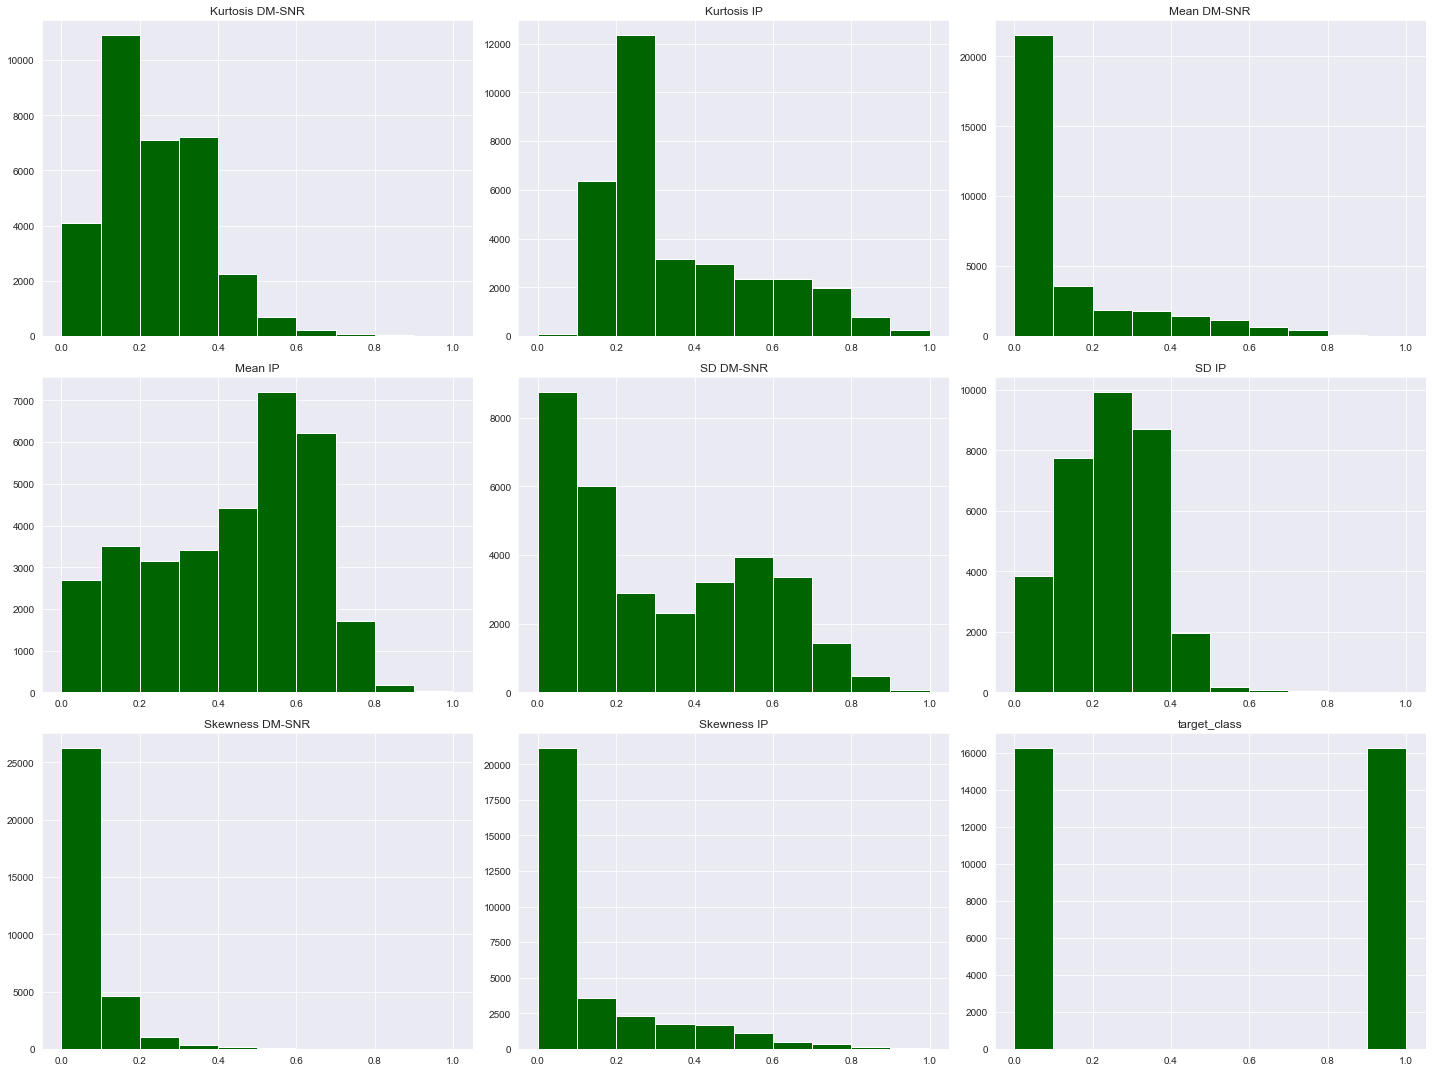

In [16]:
# Visualization Distribution of the Dataset
df.hist(figsize=(20,15), color="darkgreen")
plt.tight_layout()
plt.show()

## Features after MinMax scaling

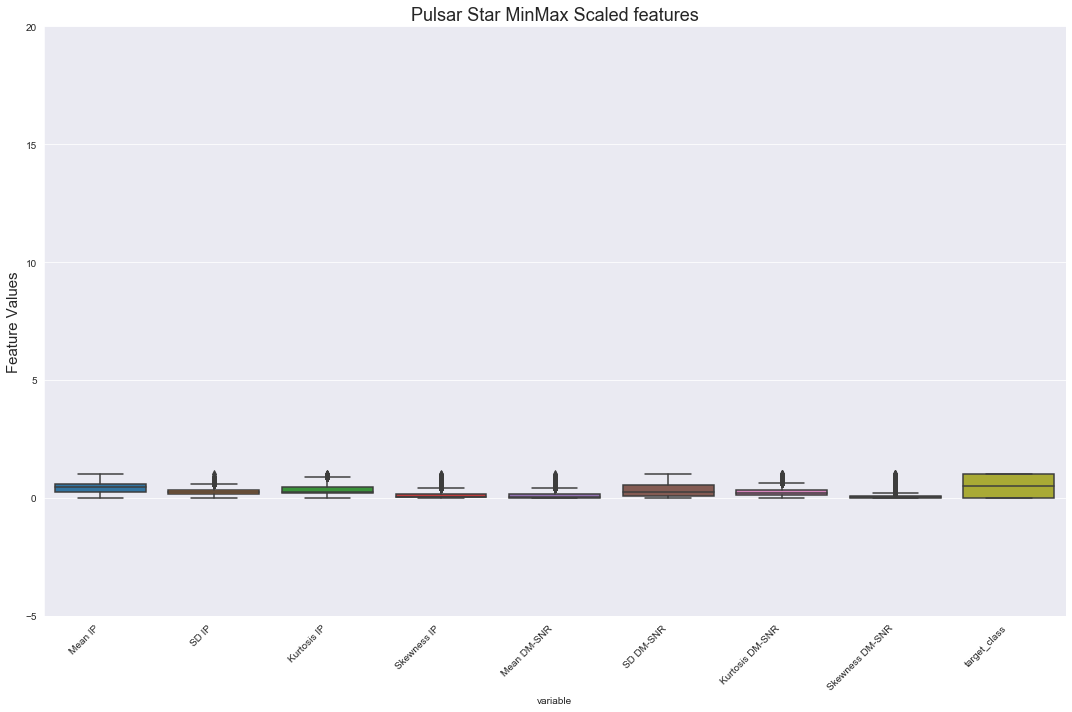

In [17]:
# Plot Data Features after MinMax scaling
plt.figure(figsize=(15,10))
sns.boxplot(x="variable", y="value", data=pd.melt(df))
plt.ylim(-5, 20)
plt.title('Pulsar Star MinMax Scaled features', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Feature Values', fontsize= 15)
plt.tight_layout()
plt.show()

# Modeling with Deep Learning Neural Network

## Prepare Data for Modeling

In [18]:
# Get data in array/matrix form suitable for Modeling
df_shuffled = df.sample(frac=1, random_state=10)
data = df_shuffled.values
data

array([[6.49533687e-01, 3.33812939e-01, 1.94212494e-01, ...,
        3.21840072e-01, 8.64297587e-02, 0.00000000e+00],
       [6.32386768e-01, 3.57394444e-01, 1.76844625e-01, ...,
        3.97890143e-01, 1.27473668e-01, 0.00000000e+00],
       [5.78813099e-01, 3.51962021e-01, 1.86590475e-01, ...,
        4.29682138e-01, 1.81276666e-01, 0.00000000e+00],
       ...,
       [4.26170211e-01, 2.21169417e-01, 3.09148661e-01, ...,
        1.68157160e-01, 9.22836811e-03, 1.00000000e+00],
       [5.51879888e-01, 3.23678942e-01, 1.88081125e-01, ...,
        7.88230755e-02, 6.15046401e-05, 0.00000000e+00],
       [6.35439756e-01, 4.26163605e-01, 2.07342350e-01, ...,
        3.06591836e-01, 7.05357078e-02, 0.00000000e+00]])

In [19]:
# Inspect to Verify the original shape of the data
data.shape

(32518, 9)

## Separate Features and Target

In [20]:
# Separate Data into features and classifcation target
feature = data[:,:-1]
target = data[:,-1]
print("shape of feature is: ", feature.shape)
print("shape of target is: ", target.shape)

shape of feature is:  (32518, 8)
shape of target is:  (32518,)


## Create Train (70%), Test (25%) and Validation (5%) Sets from Features and Target

In [21]:
# Create Train, Test and Validation sets
np.random.seed(10)
x_train = feature[:22762, :]
x_test = feature[22762:30892, :]
x_val = feature[30892:, :]
y_train = target[:22762]
y_test = target[22762:30892]
y_val = target[30892:]
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)
print("x_val shape: ", x_val.shape)
print("y_val shape: ", y_val.shape)

x_train shape:  (22762, 8)
y_train shape:  (22762,)
x_test shape:  (8130, 8)
y_test shape:  (8130,)
x_val shape:  (1626, 8)
y_val shape:  (1626,)


## Convert Our Target Data to Categorical for Classification with Keras

In [22]:
from keras.utils import to_categorical
target2 = data[:,-1]
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)
target2 = to_categorical(target2, num_classes=2)

Using TensorFlow backend.


## Build Model # 1: First try will be with sigmoid activation and 2 hidden layers

In [23]:
# Build model # 1
np.random.seed(10)
from keras import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(50, activation="relu", input_dim=8))
model.add(Dense(25, activation="relu"))
model.add(Dense(2, activation="sigmoid"))

Instructions for updating:
Colocations handled automatically by placer.


## Compile Model # 1: With rmsprop as optimizer. Binary_crossentropy should be best loss function for this classification problem

In [24]:
# Compile Model # 1 
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Model # 1: Summary

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                450       
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 52        
Total params: 1,777
Trainable params: 1,777
Non-trainable params: 0
_________________________________________________________________


## Train Model # 1: Start with 50 epochs and a batch size of 64

In [26]:
history1 = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=64)

Instructions for updating:
Use tf.cast instead.
Train on 22762 samples, validate on 8130 samples
Epoch 1/50
22762/22762 [==============================] - 2s 82us/step - loss: 0.3101 - acc: 0.9021 - val_loss: 0.1954 - val_acc: 0.9309
Epoch 2/50
22762/22762 [==============================] - 1s 45us/step - loss: 0.1963 - acc: 0.9285 - val_loss: 0.1907 - val_acc: 0.9303
Epoch 3/50
22762/22762 [==============================] - 1s 43us/step - loss: 0.1910 - acc: 0.9307 - val_loss: 0.1820 - val_acc: 0.9363
Epoch 4/50
22762/22762 [==============================] - 1s 56us/step - loss: 0.1888 - acc: 0.9323 - val_loss: 0.1810 - val_acc: 0.9382
Epoch 5/50
22762/22762 [==============================] - 1s 44us/step - loss: 0.1861 - acc: 0.9325 - val_loss: 0.1760 - val_acc: 0.9385
Epoch 6/50
22762/22762 [==============================] - 1s 44us/step - loss: 0.1841 - acc: 0.9346 - val_loss: 0.1755 - val_acc: 0.9392
Epoch 7/50
22762/22762 [==============================] - 1s 43us/step - loss: 0.

## Visualize Loss and Accuracy History of the Model

In [27]:
# Create dictionary containing training loss and accuracy scores for our model
mod_1 = history1.history
mod_1.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [28]:
# Create a function for plotting our Models training loss
def loss_plot(model=mod_1):
    test_loss = model['val_loss']
    loss_values = model['loss']
    epochs = range(1, len(loss_values) + 1)
    plt.figure(figsize=(12,5))
    plt.plot(epochs, test_loss, 'r--', label='Test loss')
    plt.plot(epochs, loss_values, 'r', label='Training loss')
    plt.title('Training Loss vs Test Loss', fontsize=18)
    plt.xlabel('Epochs', fontsize=15)
    plt.ylabel('Loss', fontsize= 15)
    plt.legend()
    plt.show()

In [29]:
# Create a function for plotting our Models training Accuracy
def acc_plot(model=mod_1):
    test_acc = model['val_acc']
    acc_values = model['acc']
    epochs = range(1, len(acc_values) + 1)
    plt.figure(figsize=(12,5))
    plt.plot(epochs, acc_values, 'b', label='Training Accuracy')
    plt.plot(epochs, test_acc, 'b--', label='Test Accuracy')
    plt.title('Training Accuracy vs Test Accuracy', fontsize=18)
    plt.xlabel('Epochs', fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    plt.legend()
    plt.show()

## Model # 1: Loss History

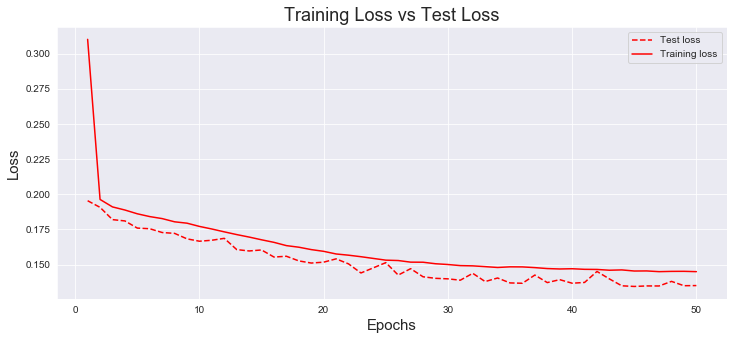

In [30]:
loss_plot(model=mod_1)

## Model # 1: Accuracy History

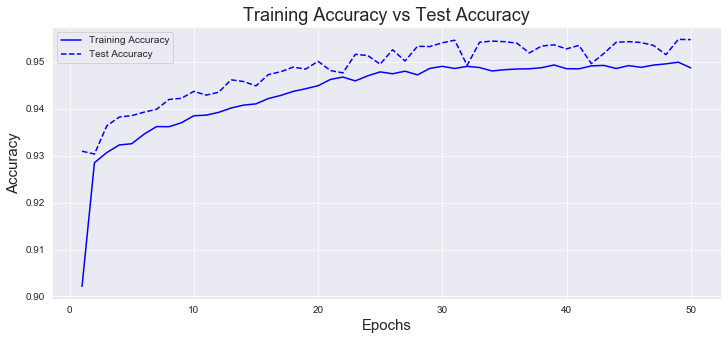

In [31]:
acc_plot(model=mod_1)

## Evaluation of Model # 1: Classification Report and Confusion Matrix for Test Set

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
# Classification Report for Test set
y_pred1 = model.predict(x_test, batch_size=64, verbose=1)
y_pred_1 = np.argmax(y_pred1, axis=1)
y_true = np.argmax(y_test, axis=1)
print('-' *60)
print(classification_report(y_true, y_pred_1))
print('-' *60)

8130/8130 [==============================] - 0s 22us/step
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      4010
           1       0.98      0.93      0.95      4120

    accuracy                           0.95      8130
   macro avg       0.96      0.96      0.95      8130
weighted avg       0.96      0.95      0.95      8130

------------------------------------------------------------


In [33]:
# function to visualize confusion Matrix
def conf_matrix(y_actual, y_predicted, cmap='Greens'):
    class_names = ['Non-Pulsar', 'Pulsar']
    mat = confusion_matrix(y_actual, y_predicted)
    dataframe = pd.DataFrame(mat, index=class_names, columns=class_names)
    plt.figure(figsize=(8,5))
    sns.heatmap(dataframe, annot=True, cbar=None, cmap=cmap, fmt='.00f', annot_kws={"size":13})
    plt.title("Confusion Matrix", fontsize=18), plt.tight_layout()
    plt.ylabel("True Class",fontsize=15), plt.xlabel('Predicted Class', fontsize=15)
    plt.show()

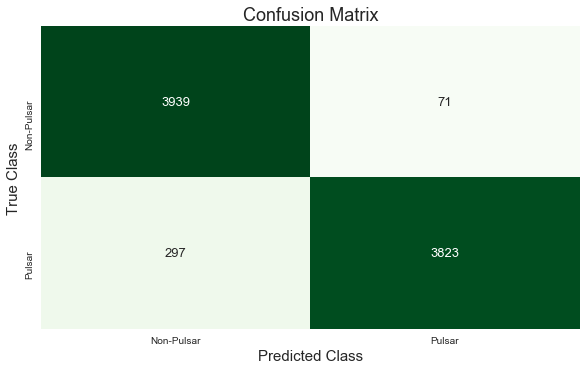

In [34]:
# Confusion Matrix Test Set Model #1
conf_matrix(y_true, y_pred_1)

## Evaluation of Model # 1: Classification Report and Confusion Matrix for Validation Set

In [35]:
# Classification Report for Validation set
y_pred1a = model.predict(x_val, batch_size=64, verbose=1)
y_pred_1a = np.argmax(y_pred1a, axis=1)
y_true_val = np.argmax(y_val, axis=1)
print('-' *60)
print(classification_report(y_true_val, y_pred_1a))
print('-' *60)

1626/1626 [==============================] - 0s 13us/step
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       828
           1       0.98      0.91      0.95       798

    accuracy                           0.95      1626
   macro avg       0.95      0.95      0.95      1626
weighted avg       0.95      0.95      0.95      1626

------------------------------------------------------------


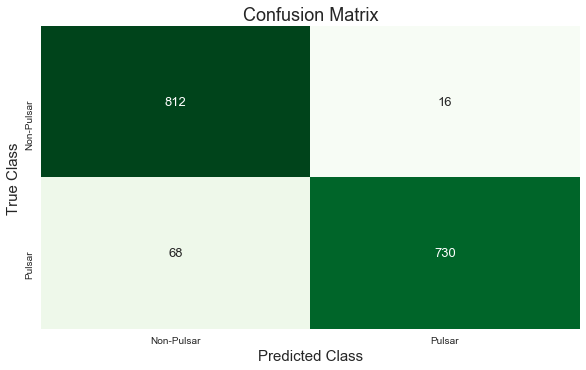

In [36]:
conf_matrix(y_true_val, y_pred_1a)

# Tuning Neural Network Hyperparameters with GridSearch

In [37]:
from keras import models
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

# Set random seed
np.random.seed(10)

## Create Function That Constructs A NN Similar to Model 1 for optimizing Hyperpameters

In [38]:
def create_network(optimizer='rmsprop'):
    
    # Start neural network
    network = models.Sequential()

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=50, activation='relu', input_dim=8))

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=25, activation='relu'))

    # Add fully connected layer with a sigmoid activation function
    network.add(layers.Dense(units=2, activation='sigmoid'))

    # Compile neural network
    network.compile(loss='binary_crossentropy', # Cross-entropy
                    optimizer=optimizer, # Optimizer
                    metrics=['accuracy']) # Accuracy performance metric
    
    # Return compiled network
    return network

## Wrap Function In KerasClassifier

In [39]:
# Wrap Keras model so it can be used by scikit-learn
neural_network = KerasClassifier(build_fn=create_network, verbose=0)

## Hyperparameter Search

In [40]:
# Create hyperparameter space
epochs = [50, 60, 70]
batches = [16, 32, 64]
optimizers = ['rmsprop', 'adam']

# Create hyperparameter options
hyperparameters = dict(optimizer=optimizers, epochs=epochs, batch_size=batches)

## GridSearch

In [41]:
# Create grid search
#grid = GridSearchCV(estimator=neural_network, param_grid=hyperparameters)

# Fit grid search
#grid_result = grid.fit(feature, target2)

## Find Best Model’s Hyperparameters

In [42]:
# View hyperparameters of best neural network
#grid_result.best_params_

In [43]:
grid_search_results = {'batch_size': 32, 'epochs': 60, 'optimizer': 'adam'}
grid_search_results

{'batch_size': 32, 'epochs': 60, 'optimizer': 'adam'}

# Model # 2: Optimized Params with Added Layer and Softmax Activation
- Tried adding multiple layers but one additional hidden layer proved best

## Build Model 2

In [44]:
# Build model # 2
np.random.seed(10)
model2 = Sequential()
model2.add(Dense(50, activation="relu", input_dim=8))
model2.add(Dense(25, activation="relu"))
model2.add(Dense(25, activation="relu"))
model2.add(Dense(2, activation="softmax"))

## Compile Model 2

In [45]:
# Compile Model # 2 
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Summary Model 2

In [46]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 50)                450       
_________________________________________________________________
dense_5 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_6 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 52        
Total params: 2,427
Trainable params: 2,427
Non-trainable params: 0
_________________________________________________________________


## Train Model 2

In [47]:
history2 = model2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=60, batch_size=32)

Train on 22762 samples, validate on 8130 samples
Epoch 1/60
22762/22762 [==============================] - 3s 150us/step - loss: 0.2461 - acc: 0.9122 - val_loss: 0.1862 - val_acc: 0.9360
Epoch 2/60
22762/22762 [==============================] - 2s 90us/step - loss: 0.1885 - acc: 0.9315 - val_loss: 0.1740 - val_acc: 0.9401
Epoch 3/60
22762/22762 [==============================] - 2s 90us/step - loss: 0.1838 - acc: 0.9349 - val_loss: 0.1690 - val_acc: 0.9421
Epoch 4/60
22762/22762 [==============================] - 2s 90us/step - loss: 0.1750 - acc: 0.9377 - val_loss: 0.1617 - val_acc: 0.9445
Epoch 5/60
22762/22762 [==============================] - 2s 90us/step - loss: 0.1676 - acc: 0.9396 - val_loss: 0.1537 - val_acc: 0.9470
Epoch 6/60
22762/22762 [==============================] - 2s 90us/step - loss: 0.1619 - acc: 0.9429 - val_loss: 0.1538 - val_acc: 0.9483
Epoch 7/60
22762/22762 [==============================] - 2s 90us/step - loss: 0.1577 - acc: 0.9442 - val_loss: 0.1499 - val_acc

22762/22762 [==============================] - 2s 92us/step - loss: 0.1312 - acc: 0.9517 - val_loss: 0.1278 - val_acc: 0.9542


## Visualize Training and Test Loss and Accuracy History of Model 2

In [48]:
# Create dictionary containing training loss and accuracy scores for our model 2
mod_2 = history2.history

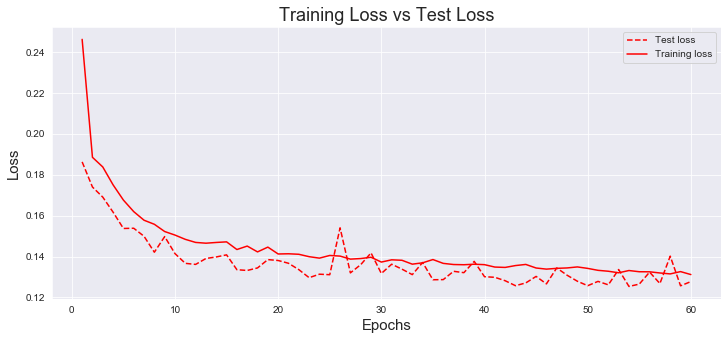

In [49]:
# Visualize the train and test loss for Model 2
loss_plot(model=mod_2)

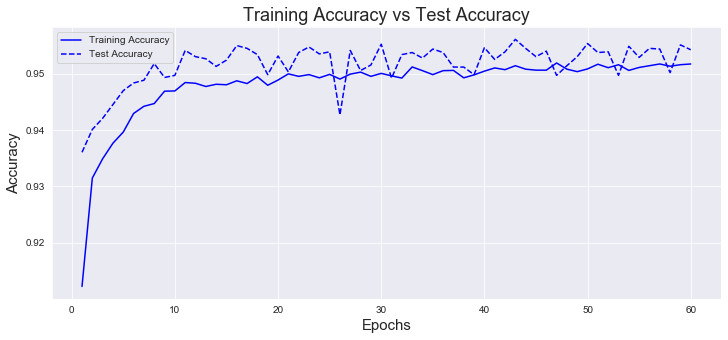

In [50]:
# Visualize the train and test Accuracy for Model 2
acc_plot(model=mod_2)

## Classification Report and Confusion Matrix for Test Set Model 2

In [51]:
# Classification Report for Test set
y_pred2 = model2.predict(x_test, batch_size=32, verbose=1)
y_pred_2 = np.argmax(y_pred2, axis=1)
y_true = np.argmax(y_test, axis=1)
print('-' *60)
print(classification_report(y_true, y_pred_2))
print('-' *60)

8130/8130 [==============================] - 0s 41us/step
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      4010
           1       0.97      0.94      0.95      4120

    accuracy                           0.95      8130
   macro avg       0.95      0.95      0.95      8130
weighted avg       0.95      0.95      0.95      8130

------------------------------------------------------------


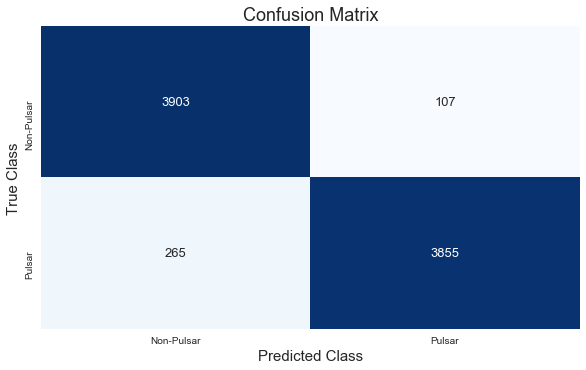

In [52]:
conf_matrix(y_true, y_pred_2, cmap='Blues')

## Validation Set Model 2

In [53]:
# Classification Report for Validation set
y_pred2a = model2.predict(x_val, batch_size=32, verbose=1)
y_pred_2a = np.argmax(y_pred2a, axis=1)
y_true_val = np.argmax(y_val, axis=1)
print('-' *60)
print(classification_report(y_true_val, y_pred_2a))
print('-' *60)

1626/1626 [==============================] - 0s 32us/step
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       828
           1       0.97      0.92      0.94       798

    accuracy                           0.95      1626
   macro avg       0.95      0.95      0.95      1626
weighted avg       0.95      0.95      0.95      1626

------------------------------------------------------------


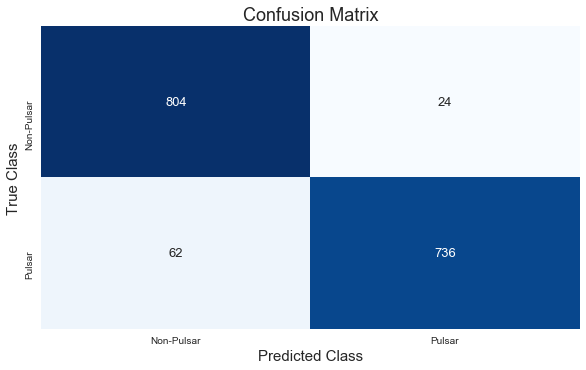

In [54]:
conf_matrix(y_true_val, y_pred_2a, cmap='Blues')

# Model 3: Optimized Parameters and Weight Regularization
- The added layer did not add much to our models performance.  It was slightly diminished
- Use Architecture similar to model 1 with optimized hyperparameters
- Add Weight regularization.  This will set a penalty for larger weight and help reduce overfitting

## Build Model 3: Tried l2 = (.1, .01, .001)  l2 = .001 Showed Best Results

In [55]:
# Build Model 3 with Weight Regularization and Optimized Hyperparameters
from keras import regularizers
np.random.seed(10)

model3 = Sequential()
model3.add(Dense(50, activation="relu", kernel_regularizer=regularizers.l2(0.001), input_dim=8))
model3.add(Dense(50, activation="relu", kernel_regularizer=regularizers.l2(0.001)))
model3.add(Dense(2, activation="softmax"))

## Compile Model 3

In [56]:
# Compile Model 3 
model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Summary Model 3

In [57]:
# Model 3 summary
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 50)                450       
_________________________________________________________________
dense_9 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 102       
Total params: 3,102
Trainable params: 3,102
Non-trainable params: 0
_________________________________________________________________


## Fit Model 3

In [58]:
# Fit Model 3
history3 = model3.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=60, batch_size=32)

Train on 22762 samples, validate on 8130 samples
Epoch 1/60
22762/22762 [==============================] - 3s 150us/step - loss: 0.2750 - acc: 0.9197 - val_loss: 0.2193 - val_acc: 0.9325
Epoch 2/60
22762/22762 [==============================] - 2s 93us/step - loss: 0.2177 - acc: 0.9295 - val_loss: 0.2031 - val_acc: 0.9357
Epoch 3/60
22762/22762 [==============================] - 2s 100us/step - loss: 0.2090 - acc: 0.9318 - val_loss: 0.2015 - val_acc: 0.9369
Epoch 4/60
22762/22762 [==============================] - 2s 94us/step - loss: 0.2037 - acc: 0.9336 - val_loss: 0.1938 - val_acc: 0.9408
Epoch 5/60
22762/22762 [==============================] - 2s 94us/step - loss: 0.1999 - acc: 0.9340 - val_loss: 0.1881 - val_acc: 0.9407
Epoch 6/60
22762/22762 [==============================] - 2s 98us/step - loss: 0.1968 - acc: 0.9366 - val_loss: 0.1894 - val_acc: 0.9400
Epoch 7/60
22762/22762 [==============================] - 2s 101us/step - loss: 0.1947 - acc: 0.9373 - val_loss: 0.1845 - val_a

22762/22762 [==============================] - 2s 92us/step - loss: 0.1596 - acc: 0.9489 - val_loss: 0.1509 - val_acc: 0.9536


## Visualize Training and Test Loss and Accuracy History of Model 3

In [59]:
# Create dictionary containing training loss and accuracy scores for our model 3
mod_3 = history3.history

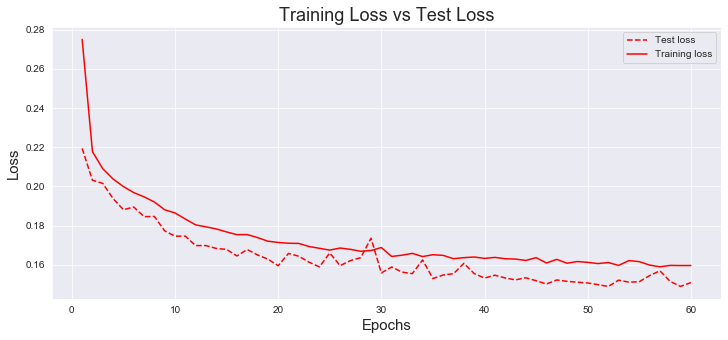

In [60]:
# Visualize the train and test loss for Model 3
loss_plot(model=mod_3)

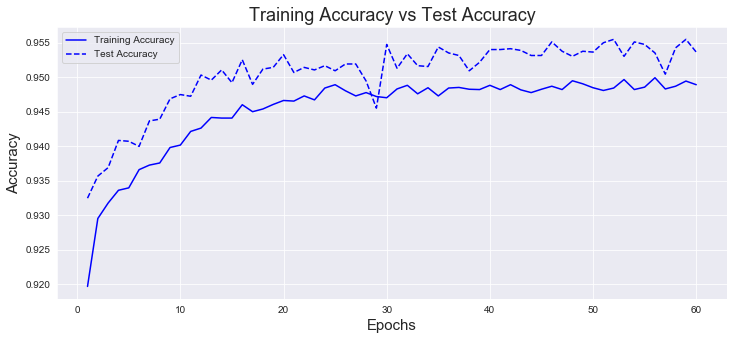

In [61]:
# Visualize the train and test Accuracy for Model 3
acc_plot(model=mod_3)

## Classification Report and Confusion Matrix for Test Set Model 3

In [62]:
# Classification Report for Test set
y_pred3 = model3.predict(x_test, batch_size=32, verbose=1)
y_pred_3 = np.argmax(y_pred3, axis=1)
y_true = np.argmax(y_test, axis=1)
print('-' *60)
print(classification_report(y_true, y_pred_3))
print('-' *60)

8130/8130 [==============================] - 0s 43us/step
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      4010
           1       0.97      0.94      0.95      4120

    accuracy                           0.95      8130
   macro avg       0.95      0.95      0.95      8130
weighted avg       0.95      0.95      0.95      8130

------------------------------------------------------------


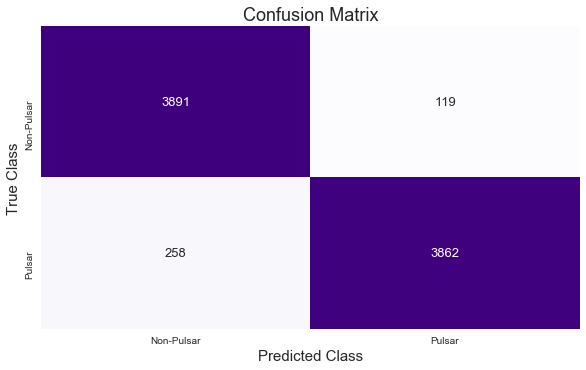

In [63]:
# Confusion Matrix Test Set Model 3
conf_matrix(y_true, y_pred_3, cmap='Purples')

## Validation Set Model 3

In [64]:
# Classification Report for Validation set
y_pred3a = model3.predict(x_val, batch_size=32, verbose=1)
y_pred_3a = np.argmax(y_pred3a, axis=1)
y_true_val = np.argmax(y_val, axis=1)
print('-' *60)
print(classification_report(y_true_val, y_pred_3a))
print('-' *60)

1626/1626 [==============================] - 0s 28us/step
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       828
           1       0.97      0.93      0.95       798

    accuracy                           0.95      1626
   macro avg       0.95      0.95      0.95      1626
weighted avg       0.95      0.95      0.95      1626

------------------------------------------------------------


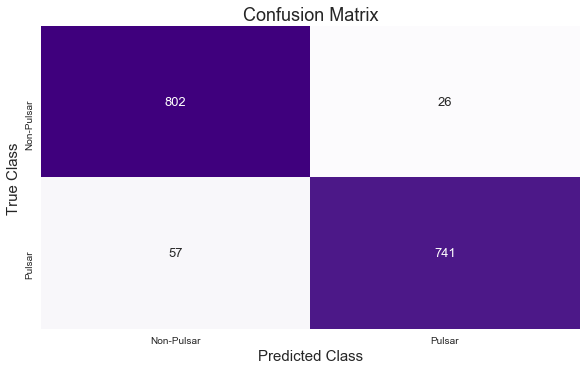

In [65]:
# Confusion Matrix Validation Set Model 3
conf_matrix(y_true_val, y_pred_3a, cmap='Purples')

# Model 4: Regularization with Dropout Layers
- L2 regularizarion gave a nice model.  But at a cost.  It decreased false negatives but increased false positives
- This is likely due to the fact that our model is not overfit. Test set is slightly outperforming training set
- This model still did not perform as well as Model 1.  We will use droput layers with similar model 1 architechture

## Build Model 4 with 2 Dropout Layers

In [66]:
from keras.layers import Dropout
np.random.seed(10)

model4 = Sequential()
model4.add(Dense(100, activation="relu", input_dim=8))
model4.add(Dropout(0.5))
model4.add(Dense(50, activation="relu"))
model4.add(Dropout(0.5))
model4.add(Dense(2, activation="softmax"))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


## Compile Model 4

In [67]:
# Compile Model 4 
model4.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Summary Model 4

In [68]:
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 100)               900       
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 50)                5050      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 102       
Total params: 6,052
Trainable params: 6,052
Non-trainable params: 0
_________________________________________________________________


## Fit Model 4

In [69]:
# Fit Model 4
history4 = model4.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=60, batch_size=32)

Train on 22762 samples, validate on 8130 samples
Epoch 1/60
22762/22762 [==============================] - 4s 183us/step - loss: 0.2609 - acc: 0.9061 - val_loss: 0.1839 - val_acc: 0.9373
Epoch 2/60
22762/22762 [==============================] - 3s 128us/step - loss: 0.2046 - acc: 0.9280 - val_loss: 0.1766 - val_acc: 0.9389
Epoch 3/60
22762/22762 [==============================] - 3s 127us/step - loss: 0.1952 - acc: 0.9314 - val_loss: 0.1728 - val_acc: 0.9394
Epoch 4/60
22762/22762 [==============================] - 3s 118us/step - loss: 0.1884 - acc: 0.9338 - val_loss: 0.1660 - val_acc: 0.9411
Epoch 5/60
22762/22762 [==============================] - 3s 124us/step - loss: 0.1845 - acc: 0.9354 - val_loss: 0.1647 - val_acc: 0.9434
Epoch 6/60
22762/22762 [==============================] - 3s 120us/step - loss: 0.1819 - acc: 0.9370 - val_loss: 0.1666 - val_acc: 0.9465
Epoch 7/60
22762/22762 [==============================] - 3s 122us/step - loss: 0.1792 - acc: 0.9385 - val_loss: 0.1589 - v

22762/22762 [==============================] - 3s 116us/step - loss: 0.1520 - acc: 0.9486 - val_loss: 0.1358 - val_acc: 0.9518
Epoch 60/60
22762/22762 [==============================] - 3s 117us/step - loss: 0.1541 - acc: 0.9468 - val_loss: 0.1362 - val_acc: 0.9546


## Visualize Training and Test Loss and Accuracy History of Model 4

In [70]:
# Create dictionary containing training loss and accuracy scores for our model 4
mod_4 = history4.history

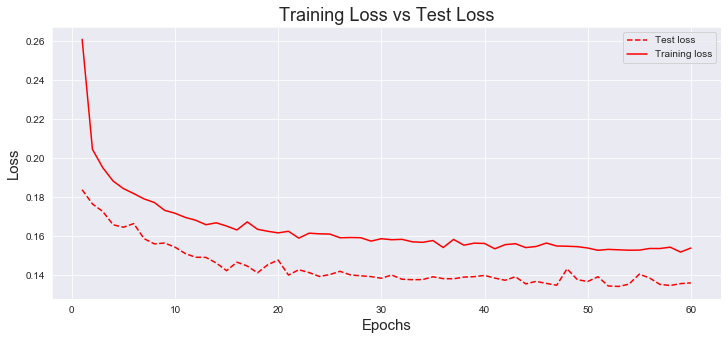

In [71]:
# Visualize the train and test loss for Model 4
loss_plot(model=mod_4)

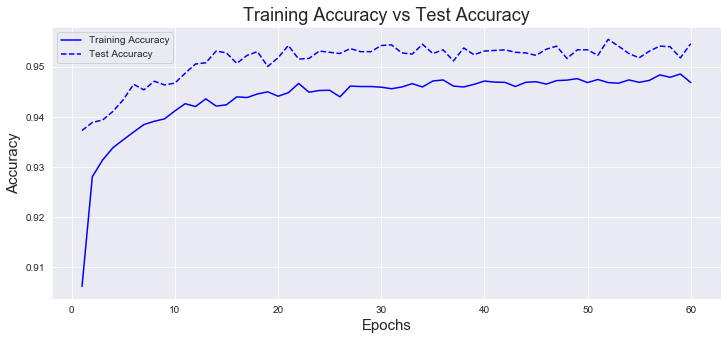

In [72]:
# Visualize the train and test Accuracy for Model 4
acc_plot(model=mod_4)

## Classification Report and Confusion Matrix for Test Set Model 4

In [73]:
# Classification Report for Test set
y_pred4 = model4.predict(x_test, batch_size=32, verbose=1)
y_pred_4 = np.argmax(y_pred4, axis=1)
y_true = np.argmax(y_test, axis=1)
print('-' *60)
print(classification_report(y_true, y_pred_4))
print('-' *60)

8130/8130 [==============================] - 0s 55us/step
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      4010
           1       0.98      0.93      0.95      4120

    accuracy                           0.95      8130
   macro avg       0.96      0.95      0.95      8130
weighted avg       0.96      0.95      0.95      8130

------------------------------------------------------------


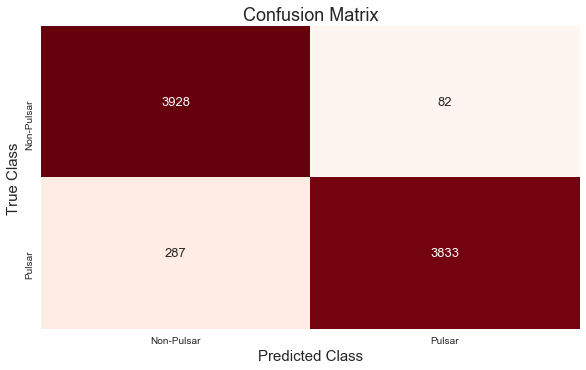

In [74]:
conf_matrix(y_true, y_pred_4, cmap="Reds")

## Validation Set Model 4

In [75]:
# Classification Report for Validation set
y_pred4a = model4.predict(x_val, batch_size=32, verbose=1)
y_pred_4a = np.argmax(y_pred4a, axis=1)
y_true_val = np.argmax(y_val, axis=1)
print('-' *60)
print(classification_report(y_true_val, y_pred_4a))
print('-' *60)

1626/1626 [==============================] - 0s 36us/step
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       828
           1       0.98      0.92      0.95       798

    accuracy                           0.95      1626
   macro avg       0.95      0.95      0.95      1626
weighted avg       0.95      0.95      0.95      1626

------------------------------------------------------------


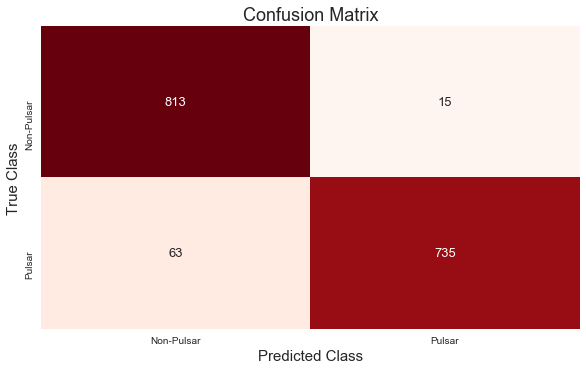

In [76]:
conf_matrix(y_true_val, y_pred_4a, cmap='Reds')

# Model 5: Model 2 & 4 performed best. Use Dropout with Added Dense Layer

## Build Model 5


In [77]:
np.random.seed(10)
model5 = Sequential()
model5.add(Dense(100, activation="relu", input_dim=8))
model5.add(Dropout(0.5))
model5.add(Dense(50, activation="relu"))
model5.add(Dropout(0.5))
model5.add(Dense(50, activation="relu"))
model5.add(Dense(2, activation="softmax"))

## Compile Model 5

In [78]:
# Compile Model 5 
model5.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Model 5 Summary

In [79]:
model5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 100)               900       
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 50)                5050      
_________________________________________________________________
dropout_4 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 102       
Total params: 8,602
Trainable params: 8,602
Non-trainable params: 0
_________________________________________________________________


## Fit Model 5

In [80]:
# Fit Model 5
history5 = model5.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=60, batch_size=32)

Train on 22762 samples, validate on 8130 samples
Epoch 1/60
22762/22762 [==============================] - 5s 200us/step - loss: 0.2545 - acc: 0.9058 - val_loss: 0.1844 - val_acc: 0.9375
Epoch 2/60
22762/22762 [==============================] - 3s 129us/step - loss: 0.1984 - acc: 0.9304 - val_loss: 0.1743 - val_acc: 0.9392
Epoch 3/60
22762/22762 [==============================] - 3s 131us/step - loss: 0.1934 - acc: 0.9316 - val_loss: 0.1695 - val_acc: 0.9410
Epoch 4/60
22762/22762 [==============================] - 3s 129us/step - loss: 0.1872 - acc: 0.9342 - val_loss: 0.1668 - val_acc: 0.9426
Epoch 5/60
22762/22762 [==============================] - 3s 133us/step - loss: 0.1825 - acc: 0.9356 - val_loss: 0.1606 - val_acc: 0.9438
Epoch 6/60
22762/22762 [==============================] - 3s 132us/step - loss: 0.1804 - acc: 0.9379 - val_loss: 0.1577 - val_acc: 0.9462
Epoch 7/60
22762/22762 [==============================] - 3s 130us/step - loss: 0.1774 - acc: 0.9370 - val_loss: 0.1561 - v

22762/22762 [==============================] - 2s 108us/step - loss: 0.1513 - acc: 0.9476 - val_loss: 0.1348 - val_acc: 0.9536
Epoch 60/60
22762/22762 [==============================] - 2s 108us/step - loss: 0.1516 - acc: 0.9459 - val_loss: 0.1372 - val_acc: 0.9524


## Visualize Training and Test Loss and Accuracy History of Model 5

In [81]:
# Create dictionary containing training loss and accuracy scores for our model 5
mod_5 = history5.history

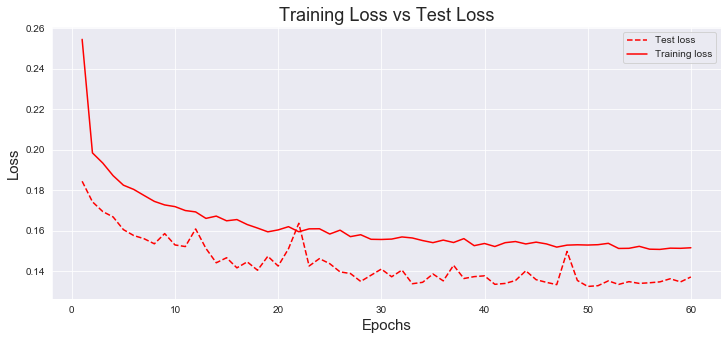

In [82]:
# Visualize the train and test loss for Model 5
loss_plot(model=mod_5)

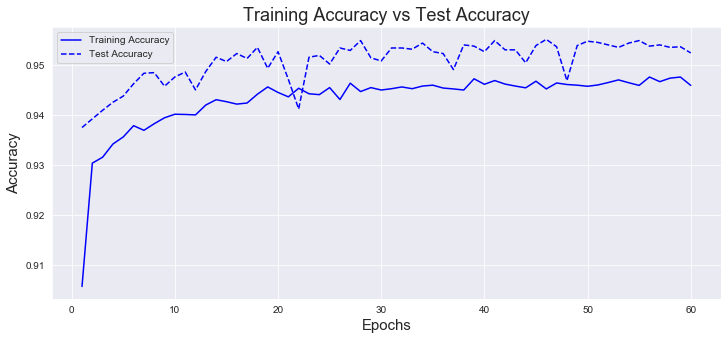

In [83]:
# Visualize the train and test Accuracy for Model 5
acc_plot(model=mod_5)

## Classification Report and Confusion Matrix for Test Set Model 5

In [84]:
# Classification Report for Test set
y_pred5 = model5.predict(x_test, batch_size=32, verbose=1)
y_pred_5 = np.argmax(y_pred5, axis=1)
y_true = np.argmax(y_test, axis=1)
print('-' *60)
print(classification_report(y_true, y_pred_5))
print('-' *60)

8130/8130 [==============================] - 0s 56us/step
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      4010
           1       0.99      0.92      0.95      4120

    accuracy                           0.95      8130
   macro avg       0.95      0.95      0.95      8130
weighted avg       0.95      0.95      0.95      8130

------------------------------------------------------------


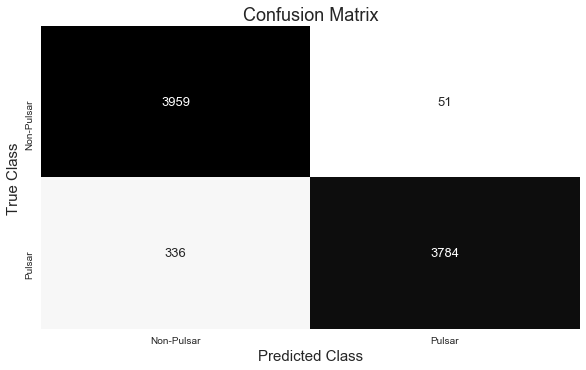

In [85]:
conf_matrix(y_true, y_pred_5, cmap="Greys")

## Validation Set Model 5

In [86]:
# Classification Report for Validation set
y_pred5a = model5.predict(x_val, batch_size=32, verbose=1)
y_pred_5a = np.argmax(y_pred5a, axis=1)
y_true_val = np.argmax(y_val, axis=1)
print('-' *60)
print(classification_report(y_true_val, y_pred_5a))
print('-' *60)

1626/1626 [==============================] - 0s 34us/step
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       828
           1       0.99      0.90      0.94       798

    accuracy                           0.95      1626
   macro avg       0.95      0.95      0.95      1626
weighted avg       0.95      0.95      0.95      1626

------------------------------------------------------------


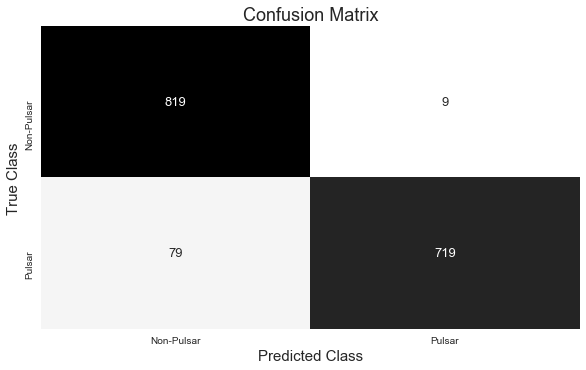

In [87]:
conf_matrix(y_true_val, y_pred_5a, cmap='Greys')

## Perform 10-Fold Cross Validation on Test Sets For Model Comparison

### Create Functions Corresponding to each of Our Models

In [88]:
def model_1():
    np.random.seed(10)
    model = Sequential()
    model.add(Dense(50, activation="relu", input_dim=8))
    model.add(Dense(25, activation="relu"))
    model.add(Dense(2, activation="sigmoid"))
    model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    return model

def model_2():
    np.random.seed(10)
    model2 = Sequential()
    model2.add(Dense(50, activation="relu", input_dim=8))
    model2.add(Dense(25, activation="relu"))
    model2.add(Dense(25, activation="relu"))
    model2.add(Dense(2, activation="softmax"))
    model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    return model2

def model_3():
    np.random.seed(10)
    model3 = Sequential()
    model3.add(Dense(50, activation="relu", kernel_regularizer=regularizers.l2(0.001), input_dim=8))
    model3.add(Dense(50, activation="relu", kernel_regularizer=regularizers.l2(0.001)))
    model3.add(Dense(2, activation="softmax"))
    model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    return model3

def model_4():
    np.random.seed(10)
    model4 = Sequential()
    model4.add(Dense(100, activation="relu", input_dim=8))
    model4.add(Dropout(0.5))
    model4.add(Dense(50, activation="relu"))
    model4.add(Dropout(0.5))
    model4.add(Dense(2, activation="softmax"))
    model4.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    return model4  

def model_5():
    np.random.seed(10)
    model5 = Sequential()
    model5.add(Dense(100, activation="relu", input_dim=8))
    model5.add(Dropout(0.5))
    model5.add(Dense(50, activation="relu"))
    model5.add(Dropout(0.5))
    model5.add(Dense(50, activation="relu"))
    model5.add(Dense(2, activation="softmax"))
    model5.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    return model5
    

### Wrap Functions In KerasClassifier

In [89]:
model_1_NN = KerasClassifier(build_fn=model_1, 
                                 epochs=60, 
                                 batch_size=32, 
                                 verbose=0)
model_2_NN = KerasClassifier(build_fn=model_2, 
                                 epochs=60, 
                                 batch_size=32, 
                                 verbose=0)
model_3_NN = KerasClassifier(build_fn=model_3, 
                                 epochs=60, 
                                 batch_size=32, 
                                 verbose=0)
model_4_NN = KerasClassifier(build_fn=model_4, 
                                 epochs=60, 
                                 batch_size=32, 
                                 verbose=0)
model_5_NN = KerasClassifier(build_fn=model_5, 
                                 epochs=60, 
                                 batch_size=32, 
                                 verbose=0)

### Conduct k-Fold Cross-Validation Using scikit-learn

#### TEST SET VALIDATION

In [90]:
#model_1_CV = cross_val_score(model_1_NN, x_test, y_test, cv=10)
#model_2_CV = cross_val_score(model_2_NN, x_test, y_test, cv=10)
#model_3_CV = cross_val_score(model_3_NN, x_test, y_test, cv=10)
#model_4_CV = cross_val_score(model_4_NN, x_test, y_test, cv=10)
#model_5_CV = cross_val_score(model_5_NN, x_test, y_test, cv=10)

#### TRAIN SET VALIDATION

In [91]:
#model_1_CV_train = cross_val_score(model_1_NN, x_train, y_train, cv=10)
#model_2_CV_train = cross_val_score(model_2_NN, x_train, y_train, cv=10)
#model_3_CV_train = cross_val_score(model_3_NN, x_train, y_train, cv=10)
#model_4_CV_train = cross_val_score(model_4_NN, x_train, y_train, cv=10)
#model_5_CV_train = cross_val_score(model_5_NN, x_train, y_train, cv=10)

#### ENTIRE DATA SET VALIDATION

In [92]:
#model_1_CV_ED = cross_val_score(model_1_NN, feature, target2, cv=10)
#model_2_CV_ED = cross_val_score(model_2_NN, feature, target2, cv=10)
#model_3_CV_ED = cross_val_score(model_3_NN, feature, target2, cv=10)
#model_4_CV_ED = cross_val_score(model_4_NN, feature, target2, cv=10)
#model_5_CV_ED = cross_val_score(model_5_NN, feature, target2, cv=10)

### 5-Fold Test Cross Validation Accuracy Values For Each Model

#### TEST SET VALIDATION

In [93]:
model_1_CV = [0.95325953, 0.94772448, 0.9495695 , 0.94464945, 0.95079951,0.95633456, 0.94833948, 0.94772448, 0.94833948, 0.95202952]       

In [94]:
model_2_CV = [0.95202952, 0.94341943, 0.95325953, 0.95202952, 0.96186962,0.96063961, 0.9495695 , 0.94833948, 0.94587946, 0.95571956]       

In [95]:
model_3_CV = [0.95202952, 0.9397294 , 0.9495695 , 0.9495695 , 0.95325953,0.95571956, 0.95202952, 0.94341943, 0.94833948, 0.95448954]

In [96]:
model_4_CV = [0.95079951, 0.94464945, 0.9495695 , 0.95079951, 0.95571956,0.96063961, 0.9495695 , 0.94464945, 0.95202952, 0.95448954]

In [97]:
model_5_CV = [0.95202952, 0.94341943, 0.94710947, 0.9495695 , 0.96063961,0.95940959, 0.95202952, 0.94710947, 0.95079951, 0.95079951]       

#### TRAIN SET VALIDATION

In [98]:
model_1_CV_train = [0.94971454, 0.93895477, 0.94815466, 0.95342707, 0.95979789,0.95408612, 0.9461775 , 0.94551845, 0.95320738, 0.95101054]       

In [99]:
model_2_CV_train = [0.95696091, 0.95125165, 0.94991213, 0.9529877 , 0.96089631,0.95079086, 0.94683656, 0.94683656, 0.95650264, 0.94859402]       

In [100]:
model_3_CV_train = [0.95256917, 0.94554238, 0.94420035, 0.95254833, 0.95782074,0.95123023, 0.94595782, 0.94771529, 0.95079086, 0.94639719]       

In [101]:
model_4_CV_train = [0.95344752, 0.94378568, 0.94771529, 0.95342707, 0.95782074,0.95474517, 0.94771529, 0.94244288, 0.95474517, 0.94903339]       

In [102]:
model_5_CV_train = [0.95300834, 0.94598155, 0.94244288, 0.95342707, 0.95518453,0.9516696 , 0.94463972, 0.94683656, 0.94947276, 0.94859402]       

#### ENTIRE DATA SET VALIDATION

In [103]:
model_1_CV_ED = [0.94833948, 0.94926199, 0.95264453, 0.95987085, 0.94803198,0.94449569, 0.94910824, 0.95249077, 0.95678253, 0.9469394]       

In [104]:
model_2_CV_ED = [0.9495695 , 0.94434194, 0.9495695 , 0.95817958, 0.94895449,0.9403444 , 0.94710947, 0.95541205, 0.9606275 , 0.9477084]       

In [105]:
model_3_CV_ED = [0.94864699, 0.9495695 , 0.95233702, 0.95787208, 0.94833948,0.94864699, 0.94772448, 0.9501845 , 0.95570594, 0.95170717]       

In [106]:
model_4_CV_ED = [0.9501845 , 0.949877  , 0.95325953, 0.95602706, 0.94926199,0.9495695 , 0.95141451, 0.95141451, 0.95509074, 0.94586281]       

In [107]:
model_5_CV_ED = [0.94833948, 0.94864699, 0.95387454, 0.95817958, 0.94833948,0.94526445, 0.95110701, 0.95079951, 0.95755152, 0.95232236]       

## Visual Comparison of Our 4 Models 5-Fold Cross Validated Accuracy

In [108]:
# Define Variables for Plot
res = [model_1_CV, model_2_CV, model_3_CV, model_4_CV, model_5_CV]
names = ['MODEL 1', 'MODEL 2', 'MODEL 3', 'MODEL 4', 'MODEL 5']

In [109]:
# Plot Our 4 models comparing 5-fold cross validated Accuracy score
def cv_plots(names=names, res=res, a= "Test"):
    plt.figure(figsize=(15,5))
    sns.boxplot(x=names, y=res, notch=True)
    plt.title('10-Fold {} Set CV Accuracy Score Of Our 5 Models'.format(a), fontsize=18)
    plt.ylabel('10-Fold Accuracy Score', fontsize= 15)
    plt.show()

#### TEST SET

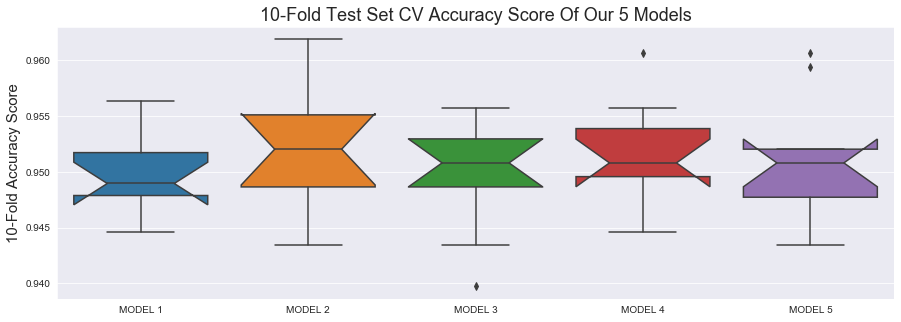

In [110]:
cv_plots()

#### TRAIN SET

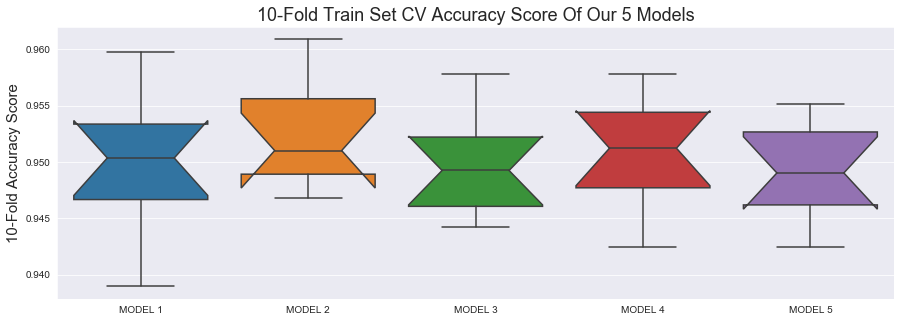

In [111]:
res2 = [model_1_CV_train, model_2_CV_train, model_3_CV_train, model_4_CV_train, model_5_CV_train]
cv_plots(res=res2, a='Train')

#### ENTIRE DATA SET

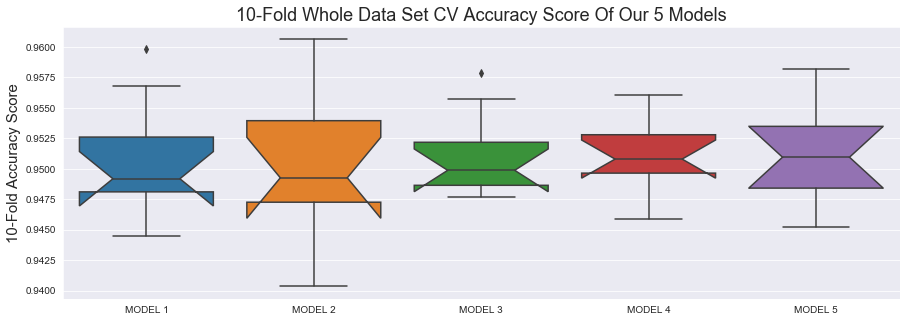

In [112]:
res3 = [model_1_CV_ED, model_2_CV_ED, model_3_CV_ED, model_4_CV_ED, model_5_CV_ED]
cv_plots(res=res3, a= "Whole Data")

# Cost Benefit Consideration
- The Pulsar Star data set does not have traditional business cost benefits associated with it.
- This is a question of Scientific Research.  Astronomers and Physicists regularly gather radio telescope data for many purposes. Not just for studying Pulsar stars. Telescope time is expensive.  However, the results of this model will not affect this cost.  These observations continue regardless.
- Identifying Pulsar stars will help scientists to better understand the universe.
- While there is not corresponding Dollar amount.  I have considered the model which provides the most useful information to the scientist.
- In terms of Potential knowledge lost I have weighted false positives equally with false negative predictions.
-  If a non-Pulsar star is falsely identified as a Pulsar star, time will be wasted to through further analysis to identify its true classification.  Or scientific insights will be made on stars that are not truly Pulsar stars.
- If actual Pulsar stars are classified as non-Pulsar stars Valuable scientific insight could be lost as these are rare events. Missing one of these rare events would be equally costly.
- Therefore, the model I have chosen here (Model 4) is the model that minimizes each of these events

# Conclusions
- We created four Deep Learning Models for the classification of Pulsar stars.
- All of our Models performed well.  I believe this was in part due to the pre-conditioning of the data for modeling.
- Our minority class was upscaled using SMOTE.  The data was also pre-processed using MinMax scaling.  Data was scaled to values between 0 and 1.  This helped to keep our weights in check throughout the neural network, preventing large fluctuations.  Having our data values between 0 and 1 also help keep the output data in line with the binary activation function of our models.
- This is evident by examining our output loss and accuracy functions.
- All models converged over relatively few epochs. Test accuracy and training accuracy remained very close to each other over the course of the model.
- There was no evidence of overfitting in our models.  There was no divergence of Training and validation scores.  In most case they converged relatively quickly.  In almost all cases test accuracy remained slightly greater than training accuracy.
- Our overall best model had an accuracy and F1 score of 96%
- 10-Fold cross validation was performed. Variation in our model equated to roughly 1%. Impressive considering the complexity of the model over five iterations.
- This is the model that minimized both false positives and false negatives
- It can be seen from the distributions graphed in notebook 2 that values for Pulsar star and non-pulsar stars are very different for almost all features. However all contain small regions of overalp where the do not differ.
- This is why we are easily able to achieve modeling scores that are 96% for accuracy and F1 scores.
- Further modeling does not raise the overall score.  It just makes classifictions that raise or lower values in the flase positive or false negative classes. This is because the two groups are just not different in these small regions of overlap for each feature


# Future Directions
- As Always more data will improve modeling.  This is particularly true for Deep Learning
- In the second notebook presented with this project I investigated several conventional machine learning approaches.
- Results from the machine learning models were very similar to the deep learning approaches
- With these models I was able to investigate feature importance
- In these models I was able to acheive the same results, or slightly better, with as few as 4 features
- Clearly several features have more impact on classification
- I will do brief investigation of deep learning with only the four most important features
- This should be investigated further
- If it turns out that equal or superior classification can be acheived with fewer features this could speed up modeling.
- This could also expedite future data collection if fewer features are needed for robust classification

## Create Data Set With Only The 4 Most Important Features


In [113]:
df_shuffled.columns

Index(['Mean IP', 'SD IP', 'Kurtosis IP', 'Skewness IP', 'Mean DM-SNR',
       'SD DM-SNR', 'Kurtosis DM-SNR', 'Skewness DM-SNR', 'target_class'],
      dtype='object')

In [114]:
df_shuffled2 = df_shuffled[['Mean IP','Kurtosis IP','SD DM-SNR','Skewness IP','target_class']]
df_shuffled2.head()

,Mean IP,Kurtosis IP,SD DM-SNR,Skewness IP,target_class
4800,0.649534,0.194212,0.080852,0.019435,0
8455,0.632387,0.176845,0.090791,0.021494,0
9090,0.578813,0.186590,0.045254,0.021763,0
18381,0.427193,0.351767,0.421705,0.103683,1
28348,0.140253,0.652473,0.569391,0.370501,1


## Prepare The Data For Modeling

In [115]:
data2 = df_shuffled2.values
data2

array([[0.64953369, 0.19421249, 0.08085182, 0.01943466, 0.        ],
       [0.63238677, 0.17684462, 0.09079097, 0.02149383, 0.        ],
       [0.5788131 , 0.18659048, 0.04525356, 0.02176294, 0.        ],
       ...,
       [0.42617021, 0.30914866, 0.39347469, 0.07952738, 1.        ],
       [0.55187989, 0.18808112, 0.83177335, 0.02962964, 0.        ],
       [0.63543976, 0.20734235, 0.10430204, 0.01738629, 0.        ]])

In [116]:
# Inspect to Verify the original shape of the data
data2.shape

(32518, 5)

## Separate Features and Target

In [117]:
# Separate Data into features and classifcation target
feature2 = data2[:,:-1]
target3 = data2[:,-1]
print("shape of feature2 is: ", feature2.shape)
print("shape of target3 is: ", target3.shape)

shape of feature2 is:  (32518, 4)
shape of target3 is:  (32518,)


## Create Train, Test, Validation Sets as Before

In [118]:
# Create Train, Test and Validation sets
np.random.seed(10)
x_train2 = feature2[:22762, :]
x_test2 = feature2[22762:30892, :]
x_val2 = feature2[30892:, :]
y_train2 = target3[:22762]
y_test2 = target3[22762:30892]
y_val2 = target3[30892:]
print("x_train2 shape: ", x_train2.shape)
print("y_train2 shape: ", y_train2.shape)
print("x_test2 shape: ", x_test2.shape)
print("y_test2 shape: ", y_test2.shape)
print("x_val2 shape: ", x_val2.shape)
print("y_val2 shape: ", y_val2.shape)

x_train2 shape:  (22762, 4)
y_train2 shape:  (22762,)
x_test2 shape:  (8130, 4)
y_test2 shape:  (8130,)
x_val2 shape:  (1626, 4)
y_val2 shape:  (1626,)


## Convert Targets to Categorical for Modeling

In [119]:
y_train2 = to_categorical(y_train2, num_classes=2)
y_test2 = to_categorical(y_test2, num_classes=2)
y_val2 = to_categorical(y_val2, num_classes=2)

## Build Model 6

In [120]:
np.random.seed(10)

model6 = Sequential()
model6.add(Dense(100, activation="relu", input_dim=4))
model6.add(Dropout(0.5))
model6.add(Dense(50, activation="relu"))
model6.add(Dropout(0.5))
model6.add(Dense(2, activation="softmax"))

## Compile Model 6: Use Model 4 Design This Was Our Most Consistent Model

In [121]:
# Compile Model 6
model6.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Model 6 Summary

In [122]:
model6.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 100)               500       
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 50)                5050      
_________________________________________________________________
dropout_6 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 2)                 102       
Total params: 5,652
Trainable params: 5,652
Non-trainable params: 0
_________________________________________________________________


## Fit Model 6

In [123]:
# Fit Model 6
history6 = model6.fit(x_train2, y_train2, validation_data=(x_test2, y_test2), epochs=60, batch_size=32)

Train on 22762 samples, validate on 8130 samples
Epoch 1/60
22762/22762 [==============================] - 4s 171us/step - loss: 0.2555 - acc: 0.9095 - val_loss: 0.1883 - val_acc: 0.9342
Epoch 2/60
22762/22762 [==============================] - 2s 100us/step - loss: 0.2082 - acc: 0.9267 - val_loss: 0.1813 - val_acc: 0.9362
Epoch 3/60
22762/22762 [==============================] - 2s 101us/step - loss: 0.2009 - acc: 0.9294 - val_loss: 0.1787 - val_acc: 0.9375
Epoch 4/60
22762/22762 [==============================] - 2s 100us/step - loss: 0.1963 - acc: 0.9315 - val_loss: 0.1715 - val_acc: 0.9400
Epoch 5/60
22762/22762 [==============================] - 2s 106us/step - loss: 0.1916 - acc: 0.9336 - val_loss: 0.1707 - val_acc: 0.9411
Epoch 6/60
22762/22762 [==============================] - 2s 100us/step - loss: 0.1886 - acc: 0.9353 - val_loss: 0.1693 - val_acc: 0.9442
Epoch 7/60
22762/22762 [==============================] - 2s 100us/step - loss: 0.1843 - acc: 0.9359 - val_loss: 0.1630 - v

22762/22762 [==============================] - 3s 115us/step - loss: 0.1630 - acc: 0.9446 - val_loss: 0.1506 - val_acc: 0.9472
Epoch 60/60
22762/22762 [==============================] - 3s 114us/step - loss: 0.1635 - acc: 0.9433 - val_loss: 0.1476 - val_acc: 0.9507


## Visualize Training and Test Loss and Accuracy History of Model 6

In [124]:
# Create dictionary containing training loss and accuracy scores for our model 6
mod_6 = history6.history

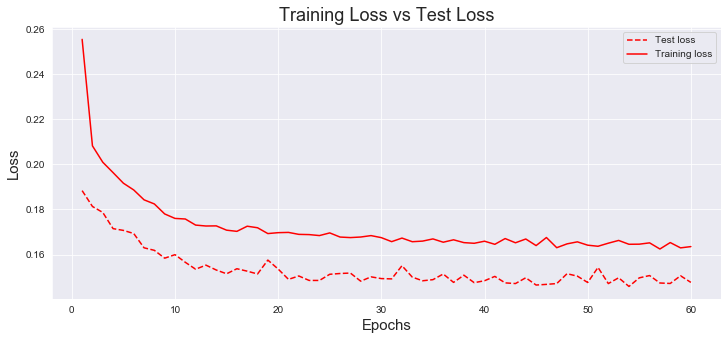

In [125]:
# Visualize the train and test loss for Model 6
loss_plot(model=mod_6)

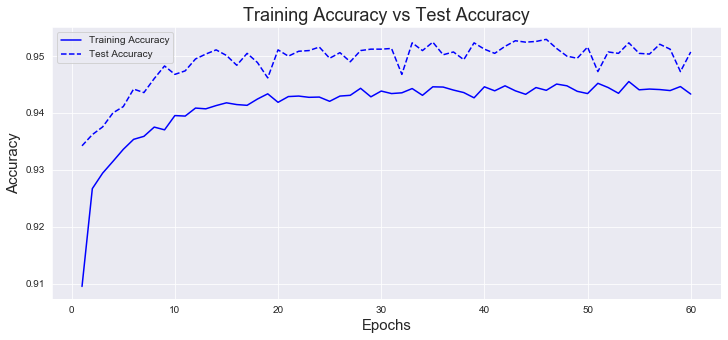

In [126]:
# Visualize the train and test loss for Model 6
acc_plot(model=mod_6)

## Classification Report and Confusion Matrix for Test Set Model 6

In [127]:
# Classification Report for Test set
y_pred6 = model6.predict(x_test2, batch_size=32, verbose=1)
y_pred_6 = np.argmax(y_pred6, axis=1)
y_true2 = np.argmax(y_test2, axis=1)
print('-' *60)
print(classification_report(y_true2, y_pred_6))
print('-' *60)

8130/8130 [==============================] - 1s 63us/step
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      4010
           1       0.97      0.93      0.95      4120

    accuracy                           0.95      8130
   macro avg       0.95      0.95      0.95      8130
weighted avg       0.95      0.95      0.95      8130

------------------------------------------------------------


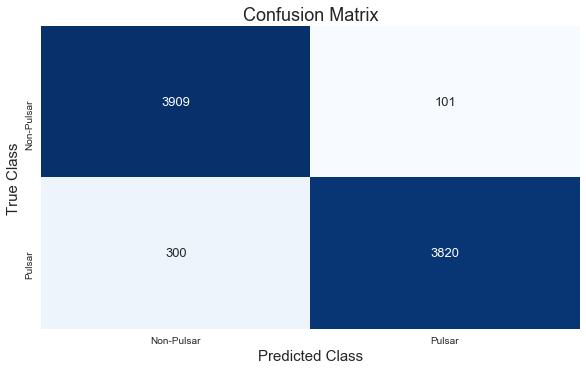

In [128]:
conf_matrix(y_true2, y_pred_6, cmap="Blues")

## Model 6 Validation Set

In [129]:
# Classification Report for Validation set
y_pred6a = model6.predict(x_val2, batch_size=32, verbose=1)
y_pred_6a = np.argmax(y_pred6a, axis=1)
y_true_val2 = np.argmax(y_val2, axis=1)
print('-' *60)
print(classification_report(y_true_val2, y_pred_6a))
print('-' *60)

1626/1626 [==============================] - 0s 37us/step
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       828
           1       0.97      0.91      0.94       798

    accuracy                           0.94      1626
   macro avg       0.94      0.94      0.94      1626
weighted avg       0.94      0.94      0.94      1626

------------------------------------------------------------


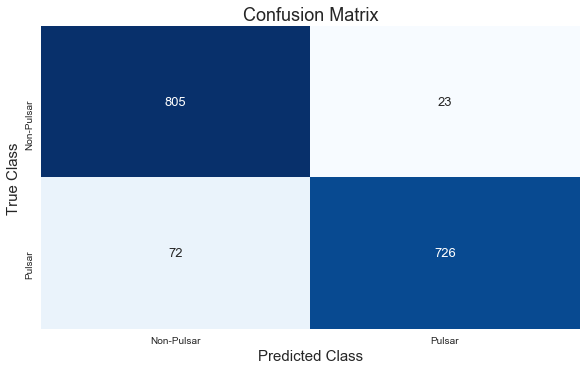

In [130]:
conf_matrix(y_true_val2, y_pred_6a, cmap="Blues")

## Our Results with 4 Features Were Not Quite as Good with all Features but worth Investigation

# Model 7: Feature Engineering
- From our analysis in notebook two we found 4 features with strong postive correlation to target
- We found 4 feeatures with strong negative correlation to Target
- We will combine to make 2 columns with strong positve correlation and 2 with strong negative correlation

In [131]:
df_shuffled.head()

,Mean IP,SD IP,Kurtosis IP,Skewness IP,Mean DM-SNR,SD DM-SNR,Kurtosis DM-SNR,Skewness DM-SNR,target_class
4800,0.649534,0.333813,0.194212,0.019435,0.010243,0.080852,0.321840,0.086430,0
8455,0.632387,0.357394,0.176845,0.021494,0.006657,0.090791,0.397890,0.127474,0
9090,0.578813,0.351962,0.186590,0.021763,0.005578,0.045254,0.429682,0.181277,0
18381,0.427193,0.162483,0.351767,0.103683,0.067952,0.421705,0.168859,0.009183,1
28348,0.140253,0.114092,0.652473,0.370501,0.272667,0.569391,0.109516,0.001851,1


In [132]:
df_shuffled3 = df_shuffled.copy()

In [133]:
df_shuffled3.head()

,Mean IP,SD IP,Kurtosis IP,Skewness IP,Mean DM-SNR,SD DM-SNR,Kurtosis DM-SNR,Skewness DM-SNR,target_class
4800,0.649534,0.333813,0.194212,0.019435,0.010243,0.080852,0.321840,0.086430,0
8455,0.632387,0.357394,0.176845,0.021494,0.006657,0.090791,0.397890,0.127474,0
9090,0.578813,0.351962,0.186590,0.021763,0.005578,0.045254,0.429682,0.181277,0
18381,0.427193,0.162483,0.351767,0.103683,0.067952,0.421705,0.168859,0.009183,1
28348,0.140253,0.114092,0.652473,0.370501,0.272667,0.569391,0.109516,0.001851,1


In [134]:
df_shuffled3['A'] = df_shuffled3['Mean IP'] + df_shuffled3['SD IP']
df_shuffled3['B'] = df_shuffled3['Kurtosis DM-SNR'] + df_shuffled3['Skewness DM-SNR']
df_shuffled3['C'] = df_shuffled3['Kurtosis IP'] + df_shuffled3['Skewness IP']
df_shuffled3['D'] = df_shuffled3['Mean DM-SNR'] + df_shuffled3['SD DM-SNR']

In [135]:
df_shuffled3.head()

,Mean IP,SD IP,Kurtosis IP,Skewness IP,Mean DM-SNR,SD DM-SNR,Kurtosis DM-SNR,Skewness DM-SNR,target_class,A,B,C,D
4800,0.649534,0.333813,0.194212,0.019435,0.010243,0.080852,0.321840,0.086430,0,0.983347,0.408270,0.213647,0.091095
8455,0.632387,0.357394,0.176845,0.021494,0.006657,0.090791,0.397890,0.127474,0,0.989781,0.525364,0.198338,0.097448
9090,0.578813,0.351962,0.186590,0.021763,0.005578,0.045254,0.429682,0.181277,0,0.930775,0.610959,0.208353,0.050832
18381,0.427193,0.162483,0.351767,0.103683,0.067952,0.421705,0.168859,0.009183,1,0.589676,0.178042,0.455449,0.489657
28348,0.140253,0.114092,0.652473,0.370501,0.272667,0.569391,0.109516,0.001851,1,0.254345,0.111367,1.022974,0.842059


In [136]:
df_shuffled4 = df_shuffled3[['A', 'B', 'C', 'D', 'target_class']]

In [137]:
df_shuffled4.head()

,A,B,C,D,target_class
4800,0.983347,0.408270,0.213647,0.091095,0
8455,0.989781,0.525364,0.198338,0.097448,0
9090,0.930775,0.610959,0.208353,0.050832,0
18381,0.589676,0.178042,0.455449,0.489657,1
28348,0.254345,0.111367,1.022974,0.842059,1


In [138]:
data4 = df_shuffled4.values
data4

array([[0.98334663, 0.40826983, 0.21364715, 0.09109451, 0.        ],
       [0.98978121, 0.52536381, 0.19833846, 0.09744835, 0.        ],
       [0.93077512, 0.6109588 , 0.20835342, 0.05083197, 0.        ],
       ...,
       [0.64733963, 0.17738553, 0.38867604, 0.45921719, 1.        ],
       [0.87555883, 0.07888458, 0.21771076, 1.29275071, 0.        ],
       [1.06160336, 0.37712754, 0.22472864, 0.11566116, 0.        ]])

In [139]:
# Inspect to Verify the original shape of the data
data4.shape

(32518, 5)

In [140]:
# Separate Data into features and classifcation target
feature4 = data4[:,:-1]
target4 = data4[:,-1]
print("shape of feature2 is: ", feature4.shape)
print("shape of target3 is: ", target4.shape)

shape of feature2 is:  (32518, 4)
shape of target3 is:  (32518,)


In [141]:
# Create Train, Test and Validation sets
np.random.seed(10)
x_train4 = feature4[:22762, :]
x_test4 = feature4[22762:30892, :]
x_val4 = feature4[30892:, :]
y_train4 = target4[:22762]
y_test4 = target4[22762:30892]
y_val4 = target4[30892:]
print("x_train2 shape: ", x_train4.shape)
print("y_train2 shape: ", y_train4.shape)
print("x_test2 shape: ", x_test4.shape)
print("y_test2 shape: ", y_test4.shape)
print("x_val2 shape: ", x_val4.shape)
print("y_val2 shape: ", y_val4.shape)

x_train2 shape:  (22762, 4)
y_train2 shape:  (22762,)
x_test2 shape:  (8130, 4)
y_test2 shape:  (8130,)
x_val2 shape:  (1626, 4)
y_val2 shape:  (1626,)


In [142]:
y_train4 = to_categorical(y_train4, num_classes=2)
y_test4 = to_categorical(y_test4, num_classes=2)
y_val4 = to_categorical(y_val4, num_classes=2)

## Build Compile and Fit Model 7

In [143]:
np.random.seed(10)

model7 = Sequential()
model7.add(Dense(100, activation="relu", input_dim=4))
model7.add(Dropout(0.5))
model7.add(Dense(50, activation="relu"))
model7.add(Dropout(0.5))
model7.add(Dense(2, activation="softmax"))

In [144]:
# Compile Model 7
model7.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [145]:
model7.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 100)               500       
_________________________________________________________________
dropout_7 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 50)                5050      
_________________________________________________________________
dropout_8 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 2)                 102       
Total params: 5,652
Trainable params: 5,652
Non-trainable params: 0
_________________________________________________________________


In [146]:
# Fit Model 
history7 = model7.fit(x_train4, y_train4, validation_data=(x_test4, y_test4), epochs=60, batch_size=32)

Train on 22762 samples, validate on 8130 samples
Epoch 1/60
22762/22762 [==============================] - 4s 188us/step - loss: 0.2695 - acc: 0.8985 - val_loss: 0.1995 - val_acc: 0.9277
Epoch 2/60
22762/22762 [==============================] - 3s 126us/step - loss: 0.2160 - acc: 0.9219 - val_loss: 0.1904 - val_acc: 0.9304
Epoch 3/60
22762/22762 [==============================] - 4s 154us/step - loss: 0.2065 - acc: 0.9265 - val_loss: 0.1897 - val_acc: 0.9292
Epoch 4/60
22762/22762 [==============================] - 3s 134us/step - loss: 0.1990 - acc: 0.9285 - val_loss: 0.1762 - val_acc: 0.9365
Epoch 5/60
22762/22762 [==============================] - 3s 130us/step - loss: 0.1920 - acc: 0.9308 - val_loss: 0.1745 - val_acc: 0.9402
Epoch 6/60
22762/22762 [==============================] - 3s 147us/step - loss: 0.1883 - acc: 0.9345 - val_loss: 0.1726 - val_acc: 0.9449
Epoch 7/60
22762/22762 [==============================] - 3s 132us/step - loss: 0.1834 - acc: 0.9353 - val_loss: 0.1639 - v

22762/22762 [==============================] - 3s 114us/step - loss: 0.1593 - acc: 0.9474 - val_loss: 0.1437 - val_acc: 0.9499
Epoch 60/60
22762/22762 [==============================] - 3s 114us/step - loss: 0.1577 - acc: 0.9466 - val_loss: 0.1432 - val_acc: 0.9522


In [147]:
# Create dictionary containing training loss and accuracy scores for our model 
mod_7 = history7.history

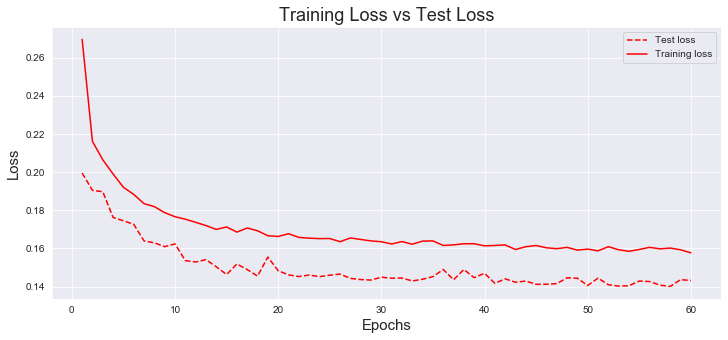

In [148]:
# Visualize the train and test loss for Model 7
loss_plot(model=mod_7)

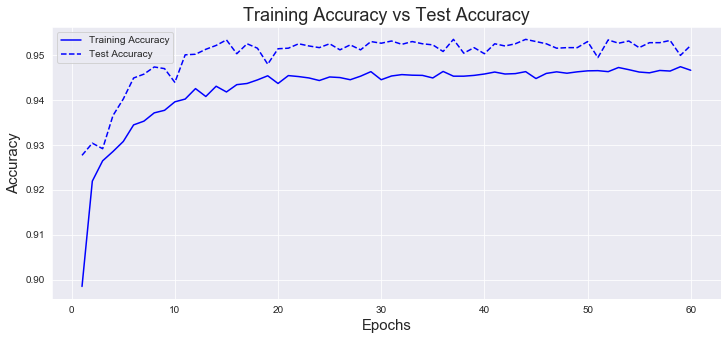

In [149]:
# Visualize the train and test loss for Model 7
acc_plot(model=mod_7)

In [150]:
# Classification Report for Test set
y_pred7 = model7.predict(x_test4, batch_size=32, verbose=1)
y_pred_7 = np.argmax(y_pred7, axis=1)
y_true4 = np.argmax(y_test4, axis=1)
print('-' *60)
print(classification_report(y_true4, y_pred_7))
print('-' *60)

8130/8130 [==============================] - 1s 66us/step
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      4010
           1       0.98      0.93      0.95      4120

    accuracy                           0.95      8130
   macro avg       0.95      0.95      0.95      8130
weighted avg       0.95      0.95      0.95      8130

------------------------------------------------------------


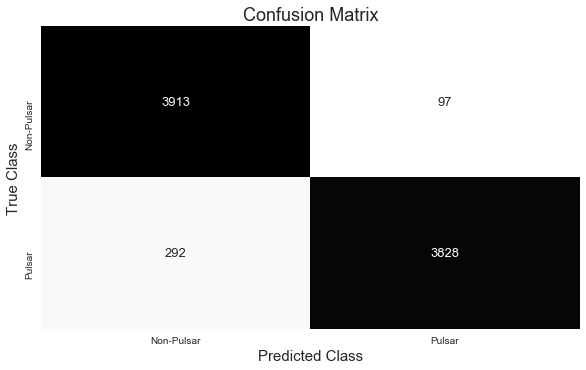

In [151]:
conf_matrix(y_true4, y_pred_7, cmap="Greys")

In [152]:
# Classification Report for Validation set
y_pred7a = model7.predict(x_val4, batch_size=32, verbose=1)
y_pred_7a = np.argmax(y_pred7a, axis=1)
y_true_val4 = np.argmax(y_val4, axis=1)
print('-' *60)
print(classification_report(y_true_val4, y_pred_7a))
print('-' *60)

1626/1626 [==============================] - 0s 37us/step
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       828
           1       0.98      0.92      0.95       798

    accuracy                           0.95      1626
   macro avg       0.95      0.95      0.95      1626
weighted avg       0.95      0.95      0.95      1626

------------------------------------------------------------


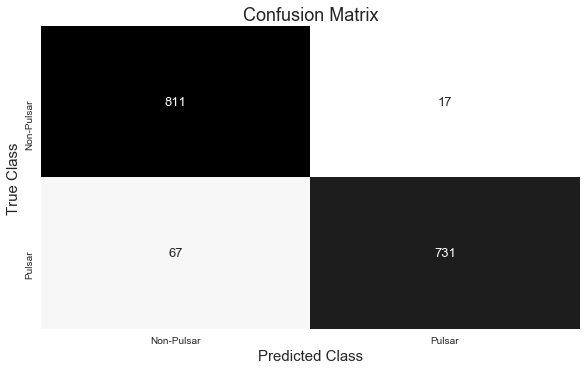

In [153]:
conf_matrix(y_true_val4, y_pred_7a, cmap="Greys")

## The Engineered Features did not give an improvement over our Best model

# THANK YOU!